In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [3]:
equipaments = pd.read_csv("data/equipaments_model.csv")

In [11]:
X = equipaments[["Latitud", "Longitud"]].values

In [18]:
equipaments.count()

Nom             218
Categoria       218
Subcategoria    218
Latitud         218
Longitud        218
dtype: int64

In [12]:
X

array([[41.30764532,  2.01030371],
       [41.31909414,  2.01330786],
       [41.31553192,  2.01597241],
       [41.31541843,  2.02154067],
       [41.30970006,  2.00607   ],
       [41.31586012,  2.00646259],
       [41.31895067,  2.01971375],
       [41.29338135,  2.02380366],
       [41.31696393,  2.02548393],
       [41.31288902,  2.01606813],
       [41.30749819,  2.00584755],
       [41.32172809,  2.01849   ],
       [41.31545365,  2.01788254],
       [41.30774442,  2.02638597],
       [41.31916198,  2.01281622],
       [41.31979072,  2.01576464],
       [41.31002768,  2.00698004],
       [41.3213687 ,  2.01490415],
       [41.3150186 ,  2.02079853],
       [41.3198123 ,  2.00621405],
       [41.31406676,  2.02377751],
       [41.31472846,  2.02209218],
       [41.3215002 ,  2.0219539 ],
       [41.32064001,  2.01101226],
       [41.32023873,  2.01046314],
       [41.30897796,  2.00947226],
       [41.32337563,  2.02879214],
       [41.30898123,  2.0099052 ],
       [41.31670896,

Centroides: [[41.31658188  2.02344016]
 [41.31125023  2.00869047]
 [41.28440163  2.04196019]
 [41.31980435  2.01247458]]


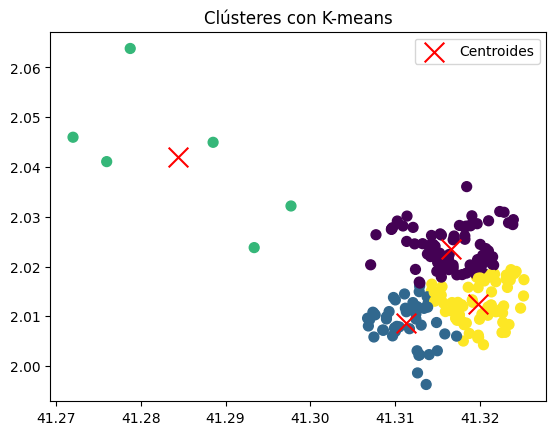

In [20]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

print("Centroides:", kmeans.cluster_centers_)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroides')
plt.legend()
plt.title("Clústeres con K-means")
plt.show()


In [19]:
import folium

kmeans = KMeans(n_clusters=30, random_state=0)
kmeans.fit(X)

map_center = [equipaments['Latitud'].mean(), equipaments['Longitud'].mean()]
mapa = folium.Map(location=map_center, zoom_start=12)

for i, label in enumerate(kmeans.labels_):
    lat, lon = X[i]
    folium.CircleMarker(
        location=[lat, lon],
        radius=8,
        color='green' if label == 0 else 'green',
        fill=True,
        fill_color='green' if label == 0 else 'green',
        fill_opacity=0.6
    ).add_to(mapa)

for i, center in enumerate(kmeans.cluster_centers_):
    lat, lon = center
    folium.Marker(
        location=[lat, lon],
        popup=f'Centroide {i+1}',
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(mapa)

mapa